CECI CONTIENT DES CODES BASESSUR L'INTOPOLATION AVEC LES POLYNOMES DE LAGRANGE ET LES DIFFERENCES DIVISEES; LE DIFFERENTE METHODE D'INTEGRATION NUMERIQUE ET UNPEU DE DERIVATION NUMERIQUE.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math

DEFINITION DES FONCTIONS DE TEST DE NOS METHODES

In [13]:
def f(x):
    return np.exp(-np.power(x,6))

def g(x):
    return 1/(1+np.power(x,2))

INTERPOLATION PAR LA METHODE DES POLYNOMES DE LAGRANGE

In [4]:
#construction de notre polynome

def Lagrange(f, a, b, n):
    x = np.linspace(a, b, n+1)        #take values between a and b with the same distribution between one to another
    X = np.poly1d([1, 0])             #here we just assign X to be the polynomial 1x+0 (also just mean x)
    
    P = 0                             #now we initialize the interpolation polynomial to be 0
    for i in range(n+1):
        Li = 1                        #just initialization for every values taken by i 
        for j in range(n+1):
            if i == j:
                continue
            else:
                Li = Li*(X-x[j])/(x[i]-x[j])    #just the formula
        P = P + f(x[i])*Li           
    return P
    

PARTIE DE TEST

In [5]:
a = -5
b = 5
x = np.linspace(a, b, 150)

In [8]:
#definition d'un tzbleau de plusieurs polynomes pour des valeurs variante de n qvec la fonction f

PN0 = [Lagrange(f, a, b, n) for n in [3,5,10, 15]]

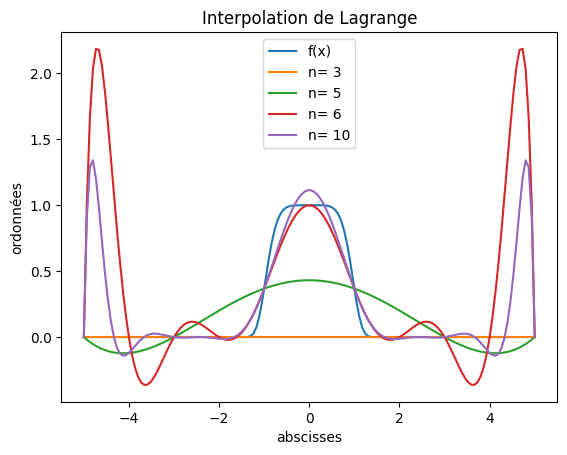

In [9]:
#final mapping

plt.plot(x, f(x))

for i in range(4):
    plt.plot(x, np.polyval(PN0[i], x))

plt.title("Interpolation de Lagrange")

tab = ["f(x)"]
tab1 = ["n= "+str(i) for i in [3, 5, 6, 10, 15]]

for n in tab1:
    tab.append(n)
    
plt.xlabel("abscisses")
plt.ylabel("ordonnées")
plt.legend(tab)
plt.show()

In [10]:
#definition d'un tzbleau de plusieurs polynomes pour des valeurs variante de n qvec la fonction f

PN1 = [Lagrange(g, a, b, n) for n in [3,5,10, 15]]

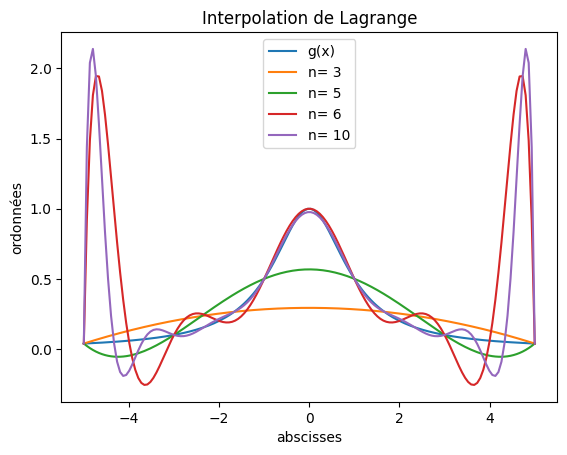

In [11]:
#final mapping

plt.plot(x, g(x))

for i in range(4):
    plt.plot(x, np.polyval(PN1[i], x))

plt.title("Interpolation de Lagrange")

tab = ["g(x)"]
tab1 = ["n= "+str(i) for i in [3, 5, 6, 10, 15]]

for n in tab1:
    tab.append(n)
    
plt.xlabel("abscisses")
plt.ylabel("ordonnées")
plt.legend(tab)
plt.show()

pour ce qui précède, on remarque bien le phenemene de rounge au borne de notre intervalle

INTERPOLATION PAR LA METHODE DES DIFFERENCES DIVISES

In [14]:
def interpolation_newton(f, a, b, n):
    # Calculer les points d'interpolation
    x = [a + (b - a) * i / (n - 1) for i in range(n)]
    
    # Calculer les valeurs de la fonction aux points d'interpolation
    y = [f(xi) for xi in x]
    
    # Calculer les différences divisées
    
    d = [[0] * (n - i) for i in range(n)]
    for i in range(n):
        d[i][0] = y[i]
    for j in range(1, n):
        for i in range(n - j):
            d[i][j] = (d[i+1][j-1] - d[i][j-1]) / (x[i+j] - x[i])
            
    # Calculer les coefficients du polynôme d'interpolation
    a = [d[0][j] for j in range(n)]
    
    # Définir la fonction d'interpolation
    def p(t):
        s = a[n-1]
        for i in range(n-2, -1, -1):
            s = s * (t - x[i]) + a[i]
        return s
    
    # Retourner la fonction d'interpolation
    return p

PARTIE TEST

CAS DE LA FONCTION f

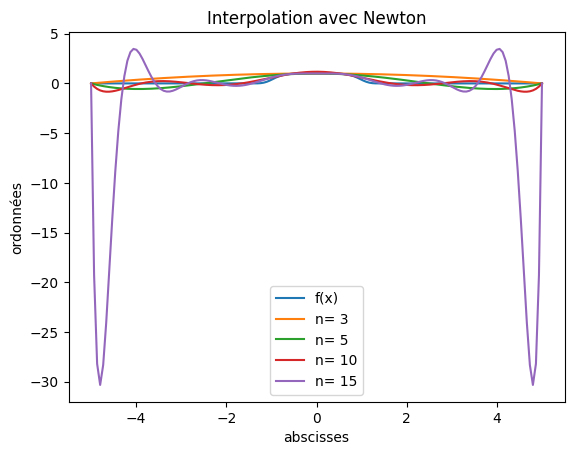

In [17]:
Tab_de_Polynome = [ interpolation_newton(f, a, b, n) for n in [3,5,10,15]]

x = np.linspace(a, b, 150)

plt.plot(x, f(x))          


for i in range(4):
    plt.plot(x, Tab_de_Polynome[i](x))


tab = ["f(x)"]
tab1 = ["n= "+str(i) for i in [3, 5, 10, 15]]

for legend in tab1:
    tab.append(legend)

plt.title("Interpolation avec Newton")
plt.xlabel("abscisses")
plt.ylabel("ordonnées")
plt.legend(tab)
plt.show()



CAS DE LA FONCTION g

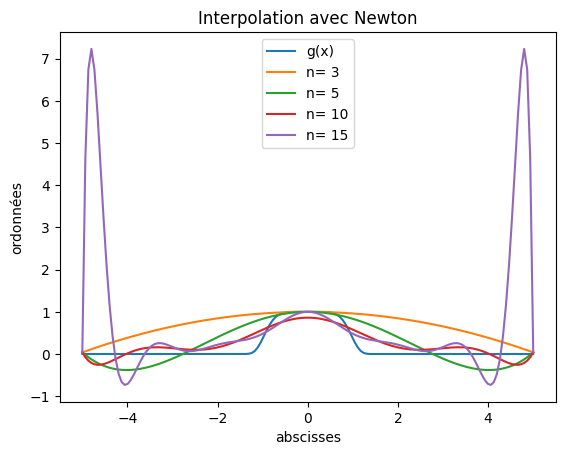

In [18]:
Tab_de_Polynome = [ interpolation_newton(g, a, b, n) for n in [3,5,10,15]]

x = np.linspace(a, b, 150)

plt.plot(x, f(x))          


for i in range(4):
    plt.plot(x, Tab_de_Polynome[i](x))


tab = ["g(x)"]
tab1 = ["n= "+str(i) for i in [3, 5, 10, 15]]

for legend in tab1:
    tab.append(legend)

plt.title("Interpolation avec Newton")
plt.xlabel("abscisses")
plt.ylabel("ordonnées")
plt.legend(tab)
plt.show()



INTEGRATION NUMERIQUE PAR LA METHODE DU RECTANGLE A GAUCHE

In [20]:
def methode_du_rectangle_gauche(f, a, b, n):
    h = (b-a)/n
    int = 0
    
    for i in range(0,n):
        xi = a + i*h
        int += f(xi)
    int *= h
    return int

In [21]:
#test pour la fonction f
methode_du_rectangle_gauche(f, 0, 1, 100)

0.4554865083873183

INTEGRATION NUMERIQUE PAR LA METHODE DU RECTANGLE A DROITE

In [22]:
def methode_du_rectangle_droite(f, a, b, n):
    h = (b-a)/n
    int = 0
    
    for i in range(1,n+1):
        xi = a + i*h
        int += f(xi)
    int *= h
    return int

In [23]:
#test pour la fonction f
methode_du_rectangle_droite(f, 0, 1, 100)

0.4639012182353973

INTEGRATION NUMERIQUE PAR LA METHODE DU POINT MILIEU

In [24]:
def methode_du_point_milieu(f, a, b, n):
    h = (b-a)/n
    int = 0
    for i in range(0, n):
        xi = a + (2*i+1)*h/2
        int += f(xi)
    int *= h
    return int

In [25]:
#test pour la fonction f
methode_du_point_milieu(f, 0, 1, 100)

0.45969960954450584

INTEGRATION NUMERIQUE PAR LA METHODE DES TRAPEZES

In [26]:
#definition de la fontion d'approximation de léintegrale

def methode_des_trapezes(f, a, b, n):
    h = (b-a)/n
    int = 0.5*f(a) + 0.5*f(b)
    for i in range(1, n):
        x_i = a + i*h
        int += f(x_i)
    int *= h
    return int


In [27]:
#test pour la fonction f
methode_des_trapezes(f, 0, 1, 150)

0.45969599154654694

INTEGRATION NUMERIQUE PAR LA METHODE DE SIMPSON

In [28]:
def methode_de_simpson(f, a, b, n):
    h = (b-a)/n
    int = 0
    for i in range(n):
        x1 = a + i*h
        x2 = a + (2*i+1)*h/2
        x3 = a + (i+1)*h
        int += (x3-x1)*(f(x1)+4*f(x2)+f(x3))
    int /= 6
    return int

In [29]:
#test pour la fonction f
methode_de_simpson(f, 0, 1, 100)

0.45969769413345646

INTEGRATION NUMERIQUE PAR LES METHODE DE GAUS LEGENDRE

In [33]:
def gauss_legendre_2(f, a, b):
    # Coefficients et points d'intégration
    x = [-1/math.sqrt(3), 1/math.sqrt(3)]
    w = [1, 1]
    # Transformation de l'intervalle [a, b] à [-1, 1]
    t = lambda x: (b-a)/2 * x + (b+a)/2
    
    # Calcul de l'intégrale
    I = sum(w[i]*f(t(x[i])) for i in range(2))*(b-a)/2
    return I

In [34]:
gauss_legendre_2(f, 0, 1)

0.45958781239526497

In [35]:
def gauss_legendre_3(f, a, b):
    # Coefficients et points d'intégration
    x = [-math.sqrt(3/5), 0, math.sqrt(3/5)]
    w = [5/9, 8/9, 5/9]
    # Transformation de l'intervalle [a, b] à [-1, 1]
    t = lambda x: (b-a)/2 * x + (b+a)/2
    # Calcul de l'intégrale
    I = sum(w[i]*f(t(x[i])) for i in range(3)) * (b-a)/2
    return I

In [36]:
gauss_legendre_3(f, 0, 1)

0.4596979301316839

In [37]:
def gauss_legendre_4(f, a, b):
    # Coefficients et points d'intégration
    x = [-math.sqrt(3/7 - 2/7*math.sqrt(6/5)), -math.sqrt(3/7 + 2/7*math.sqrt(6/5)), math.sqrt(3/7 + 2/7*math.sqrt(6/5)), math.sqrt(3/7 - 2/7*math.sqrt(6/5))]
    w = [(18-math.sqrt(30))/36, (18+math.sqrt(30))/36, (18+math.sqrt(30))/36, (18-math.sqrt(30))/36]
    # Transformation de l'intervalle [a, b] à [-1, 1]
    t = lambda x: (b-a)/2 * x + (b+a)/2
    # Calcul de l'intégrale
    I = sum(w[i]*f(t(x[i])) for i in range(4)) * (b-a)/2
    return I


In [38]:
gauss_legendre_4(f, 0, 1)

0.44848535562218955

METHODE DU POINT MILIEU AVEC PRECISION DE L'ERREUR

In [39]:
def midpoint_rule(f, a, b, precision):
    n = 1
    integral_prev = 0
    integral = (b - a) * f((a + b) / 2)
    while abs(integral - integral_prev) > precision:
        integral_prev = integral
        n *= 2
        h = (b - a) / n
        x = a + h / 2
        integral = 0
        for i in range(n):
            integral += f(x) * h
            x += h
    return integral

In [41]:
def h(x):
    return math.sin(x)

approximation = midpoint_rule(h, 0, math.pi/2, 1e-6)
print("L'approximation de l'intégrale de sin(x) sur [0, pi/2] est : ", approximation)

L'approximation de l'intégrale de sin(x) sur [0, pi/2] est :  1.00000009804572


Code pour la derivation numerique centrée

cas centré

In [42]:
def r(x):
    return np.sin(x)

# Définir le point d'évaluation
x = 0.5

# Définir le pas de discrétisation
h = 0.001

# Calculer la dérivée numérique de f en x
df_dx = (r(x + h) - r(x - h)) / (2*h)

# Afficher le résultat
print("La dérivée numérique de r en x =", x, "est", df_dx)

La dérivée numérique de r en x = 0.5 est 0.8775824156266321


cas non centré

In [43]:
import numpy as np

# Définir la fonction f
def f(x):
    return np.sin(x)

# Définir le point d'évaluation
x = 0.5

# Définir le pas de discrétisation
h = 0.001

# Calculer la dérivée numérique de f en x
df_dx = (f(x + h) - f(x)) / h  # ou df_dx = (f(x) - f(x - h)) / h

# Afficher le résultat
print("La dérivée numérique de f en x =", x, "est", df_dx)

La dérivée numérique de f en x = 0.5 est 0.8773427028773151
